In [14]:
import sys
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [10]:
data_path='/media/maria/DATA1/Documents/data_for_suite2p/TX39/'
dt=1
spks= np.load(data_path+'spks.npy')
print('Shape of the data matrix, neurons by timepoints:',spks.shape)
iframe = np.load(data_path+'iframe.npy') # iframe[n] is the microscope frame for the image frame n
ivalid = iframe+dt<spks.shape[-1] # remove timepoints outside the valid time range
iframe = iframe[ivalid]
#Shuffle
S = spks[:, iframe+dt]
del spks

Shape of the data matrix, neurons by timepoints: (18795, 30766)


In [11]:
sampled_neurons=np.random.randint(18795, size=1000)
neurons=S[sampled_neurons,:]
del S

In [12]:
corr_coef=np.corrcoef(neurons)
print(corr_coef.shape)

(1000, 1000)


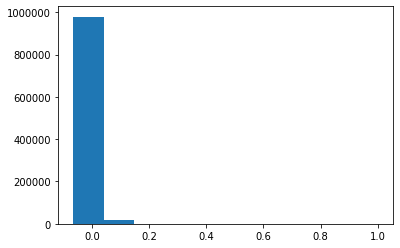

In [18]:
plt.hist(corr_coef.flatten())
median=np.median(corr_coef)